# Import Libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import community
from collections import defaultdict
import random
#import os

# Load the adjacency matrix for village 68

In [16]:
#os.chdir("/Users/Miram/Desktop/Network Analytics/Assignment 3/1. Network Data/Adjacency Matrices")
G = np.loadtxt('adj_allVillageRelationships_HH_vilno_68.csv', dtype=int, delimiter=',')
G = np.matrix(G)
G = nx.from_numpy_matrix(G)

## Transform graph to adjacency list format

In [17]:
#Write to file
nx.write_adjlist(G, "vil_68.adjlist")

#Reread file
G2 = nx.read_adjlist("vil_68.adjlist")

# Detect community structure

9


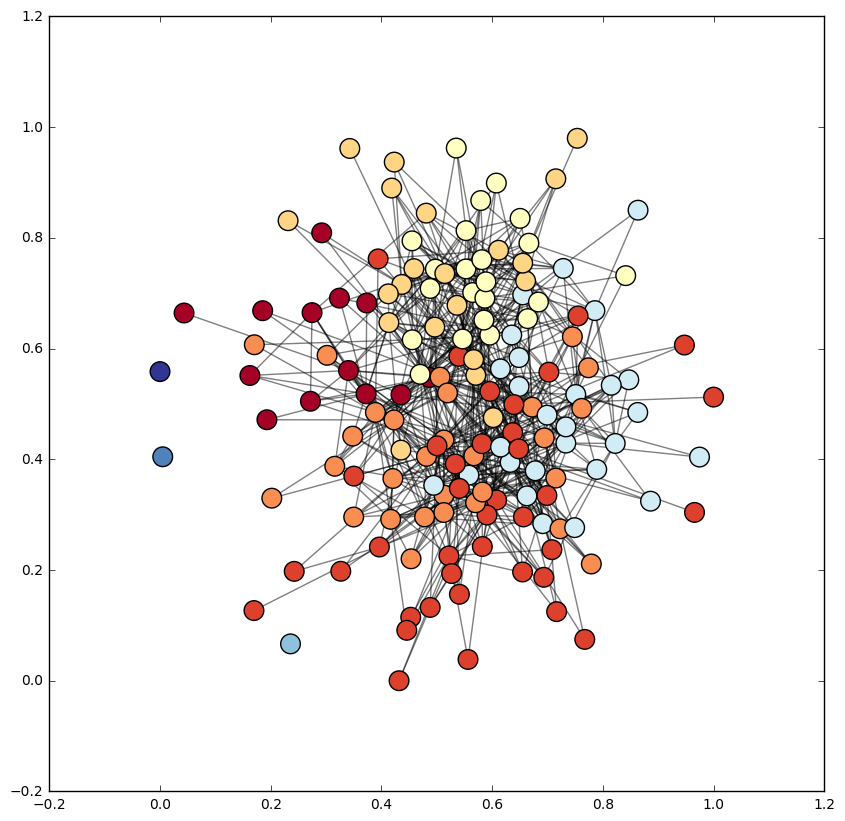

In [18]:
partition = community.best_partition(G2)
communities_cnt = len(set(partition.values())) #13 communities
print(communities_cnt)
pos = nx.spring_layout(G2)
plt.figure(figsize=(10,10))
#plt.axis('off')
values = [partition.get(node) for node in G2.nodes()]
nx.draw_networkx_nodes(G2, pos, node_size=200, cmap=plt.cm.RdYlBu, 
                       node_color=values)

nx.draw_networkx_edges(G2, pos, alpha=0.5)
plt.show()
plt.savefig("community_households.png")

## Create bubble chart to represent the size of each community

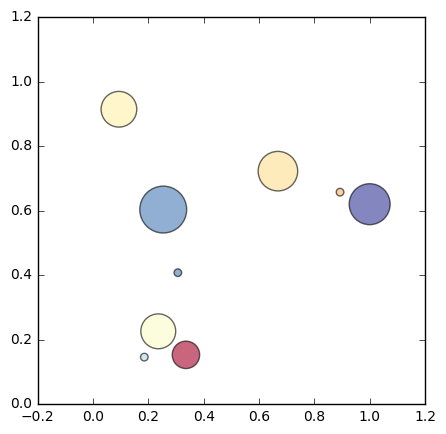

In [19]:
bubbles = nx.Graph()
parts=defaultdict(int)
for part in partition.values():
    parts[part] += 1
for part in parts.items():
    bubbles.add_node(part[0], size=part[1])
pos2 = nx.random_layout(bubbles) 
plt.figure(figsize=(5,5))
#plt.axis('off')
nx.draw_networkx_nodes(bubbles, pos2, alpha=0.6, node_size=[x*30 for x in list(parts.values())], 
                       node_color=[random.random() for x in list(parts.values())], 
                                   cmap=plt.cm.RdYlBu)
plt.show()
plt.savefig("community_bubblechart.png")

In [20]:
coms = {}
for com_nbr in set(partition.values()):
    coms[com_nbr] = [nodes for nodes in partition.keys() if partition[nodes] == com_nbr]
print("The best partition found consists of the following communities:\n", coms)

modularity = community.modularity(partition, G2)
print("The modularity of this partition is:", modularity)

print("The size of each community:", parts.values())

The best partition found consists of the following communities:
 {0: ['31', '85', '86', '29', '61', '65', '87', '83', '82', '37', '81', '80', '152'], 1: ['23', '134', '19', '135', '89', '22', '15', '9', '107', '38', '4', '11', '138', '136', '16', '6', '5', '3', '7', '17', '102', '0', '75', '10', '21', '8', '2', '140', '36', '39', '20', '40', '14', '1', '24', '84', '139', '18'], 2: ['88', '137', '96', '103', '141', '12', '143', '105', '13', '106', '92', '97', '79', '93', '94', '77', '90', '104', '95', '144', '43', '99', '149', '76', '150', '100', '142', '91', '78'], 3: ['67', '146', '54', '45', '33', '145', '34', '59', '60', '53', '63', '41', '55', '32', '147', '66', '56', '64', '30', '57', '58'], 4: ['73', '70', '115', '71', '121', '51', '122', '117', '74', '120', '116', '52', '50', '48', '44', '46', '118', '72', '62', '49', '35', '119'], 5: ['133', '111', '148', '28', '114', '123', '27', '112', '109', '68', '25', '69', '129', '130', '108', '127', '132', '126', '131', '151', '124', '11

# Interpretation

The best partition found consists of 9 communities, among these, we have 3 main communities as shown in the bubble chart representing the size of each community by the circle area. These communities represent the Forward caste (aka General Class), the Scheduled Caste, and the Backward Class (OBC).

Next, we will find favor exchange communities by partitioning the **borrowing material goods (kerosene, rice)** data.
We will also find temple company communities by partitioning the **with whom he or she goes to pray (e.g., at a temple, church or mosque)** data.

The modularity of the favor exchange partition (0.67) is higher than the "all village relationships" partition we examined above (0.38), with many more communities (a total of 37), which means that favor exchange requires much more incentive.

We now examine if people in this village tend to exchange favors with people with the same religious beliefs.
This partition turns out to have the highest modularity (0.86) with the highest number of communities, which means that people with the same religious beliefs tend to have dense connections between each other, and very few connections with other communities in india.

Looking at some of the temple company communities:
* 0: ['145', '146'] ... belong to the same favor exchange community
* 10: ['103', '105'] ... belong to the same favor exchange community
* 38: ['19', '15', '36', '20'] ... 19, 15, and 20 belong to the same favor exchange community
* 40: ['82', '83', '80'] ... belong to the same favor exchange community

Most of these communities are contained in the favor exchange communities, which proves our hypothesis that religion in india is an incentive for people to exchange favors.
exchange favor communities:
* 0: [**'145'**, '14', '41', '63', '66', '45', '40', '99', '32', '67', '31', **'146'**, '34', '62', '44', '64']
* 9: ['136', '91', '93', '102', '89', '97', '95', '137', '88', '96', '79', '94', **'103'**, '100', '78', '141', **'105'**, '106', '144', '92', '142', '29', '74']
* 3: ['8', '16', **'19'**, '24', '23', '7', '22', **'15'**, '4', '11', '21', '140', **'20'**]
* 19: [**'82'**, '81', '87', **'83'**, **'80'**, '86']

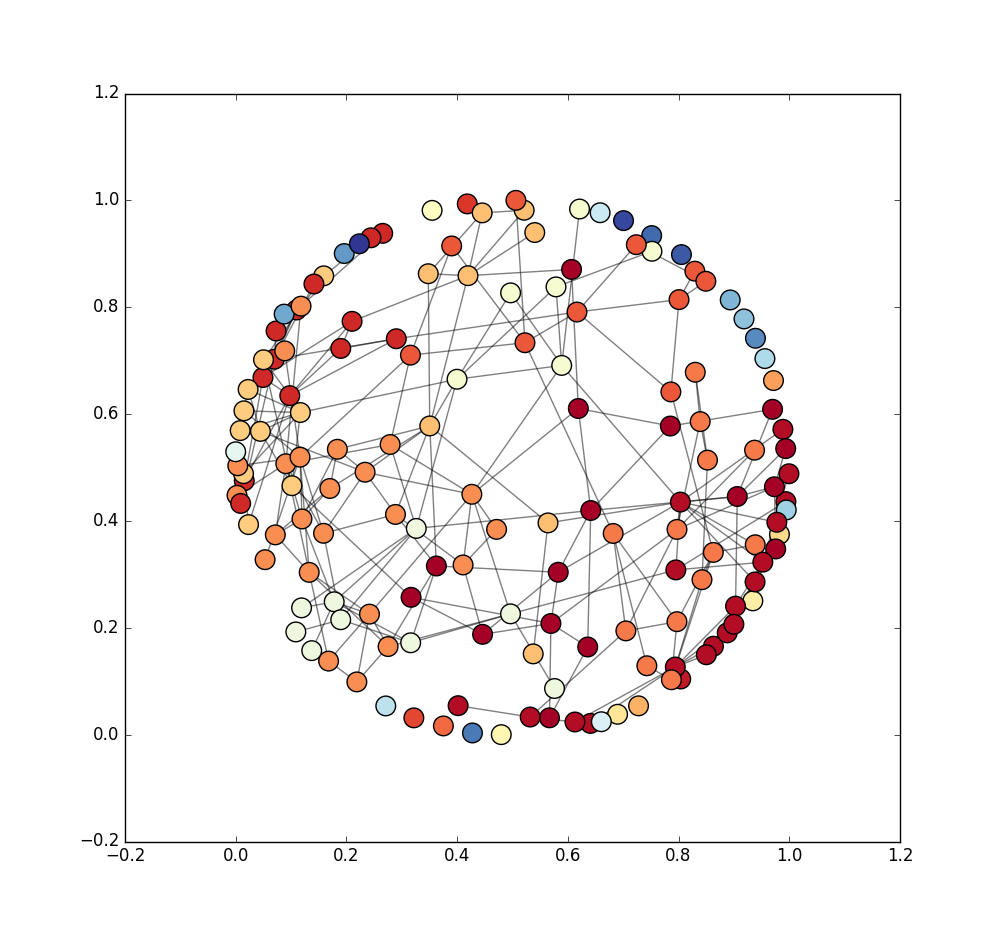

In [21]:
from IPython.display import Image
Image(filename="keroricecome_households.png")

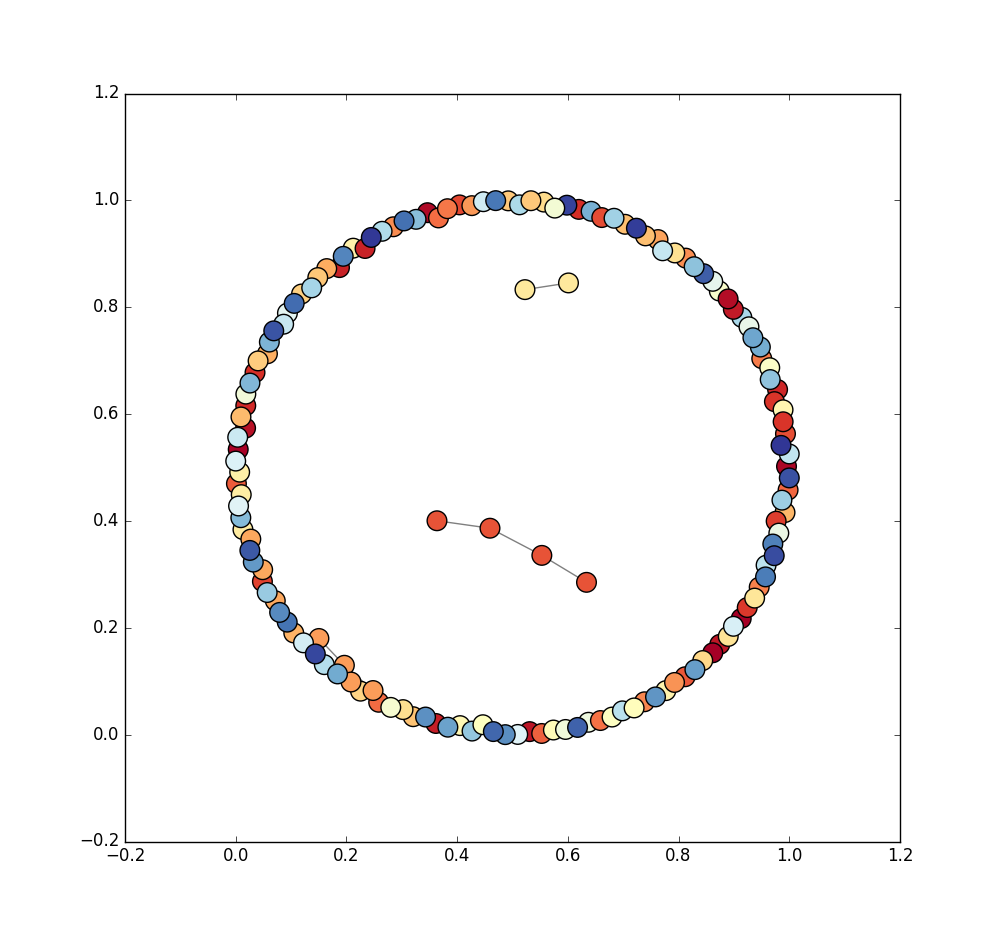

In [22]:
from IPython.display import Image
Image(filename="templecompany_households.png")

## Q2. Bass Model

The Bass model is the following equation

$$
F_t = (p + q[\frac{C_{t-1}}{m}])(m - c_{t-1})
$$

Where $m$ is the estimated size of the market, $p$ is the likelihood of people who would adopt the product assuming no influence from others, while $q$ is the likelihood of adopting the product from being influenced by someone else in their network who has adopted the product.

Our aim is to estimate the unknown parameters $m$, $p$, and $q$. To do this, given a data set, we attempt to find a solution set $(m,p,q)$ such that the squared difference between the forecast $F_t$ and the actual adoptees $S_t$ at all time periods $t$ is minimised.

In the context of the DOCTOR data set, $C_t$ is the cumulative revenue earned at time $t$ while $S_t$ is the revenue earned at time $t$ and $F_t$ is the forecasted accumulated revenue. There are 12 time periods in this data set. Since revenue is simply a multiple of the number of "adoptees" (assuming number of people who watch the movie more than once are negligible), we can use the revenue as the "number of adoptees".

Finally, we estimate the parameters with an optimisation problem to minimise squared errors as follows.

$$
\begin{aligned}
min & \sum_{i=1}^{12} (F_t - S_t)^2\\
s.t \text{ }& F_t = (p + q[\frac{C_{t-1}}{m}])(m - c_{t-1}) & t = 2,...,12 \\
& F_1 = m p
\end{aligned}
$$

Note that since this problem is not convex, out solution is not guaranteed to be a global minimum.

### Rolling-Horizon estimate

To obtain a rolling-horizon estimate, we use a subset of the data to estimate the parameters and forecast the revenue of the next time period. Running the model in AMPL using the different subsets (up to time $t$), we get the following estimates of the parameters and the forecast of the next period.

\begin{array}{c|ccc}
t & m & p & q & F_{t+1} \\
\hline
4 & 15.2956 & 0.0942142 & 1.66781 & 5.565598 \\
5 & 20.1184 & 0.07872 & 1.30893 & 0 & \\
6 & 25.8154 & 0.0737613 & 0.927715 & 0 \\
7 & 28.7628 & 0.0724826 & 0.773655 & 0 \\
8 & 30.8454 & 0.0722345 & 0.673796 & 0 \\
9 & 32.4913 & 0.0724768 & 0.597851 & 0 \\
10& 33.6167 & 0.0728771 & 0.546953 & 0 \\
11& 34.3128 & 0.0732449 & 0.515545 & 0 \\
12& 34.85 & 0.0735885 & 0.491362 & 0
\end{array}

As we can see from the results above, the rolling-horizon estimate does not do a good job of forecasting the next period's revenue. The solution will set $m$, the market size, to be the market size at time $t-1$, $C_{t-1}$ (accumulated revenue). As such, the market is saturated and has no more room to grow for the next period. Therefore, in order to obtain accurate estimates with the rolling horizon method, we would need $m$ to be known beforehand through other methods such as surveys and market expertise.

One pattern that we notice is that as $t$ increases, the parameters $m$, $p$ and $q$ seem to converge to different points. With added data, we might see these values eventually converge to a proper estimate of the true parameters.

### Final Estimate

Using all the data, we obtain the final estimate of the parameters,

\begin{array}{ccc}
m & p & q\\ \hline
34.85 & 0.0735885 & 0.491362
\end{array}

This is exactly the same as the estimate obtained in the article.

Finall, the estimate of the revenue over time is shown in the graph below.

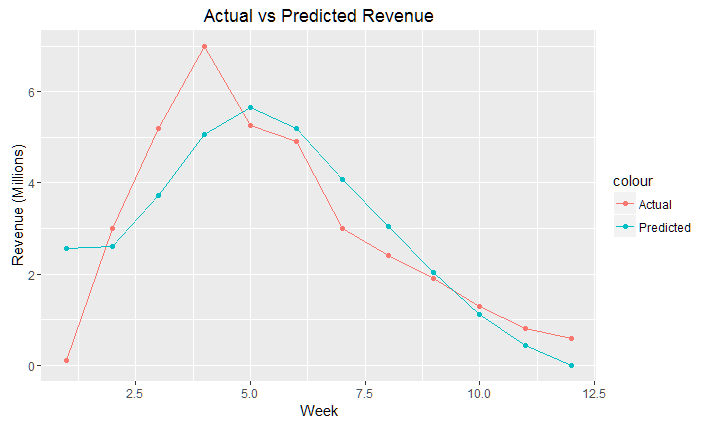

In [1]:
from IPython.display import Image
Image(filename="q2plot.png")

The predicted revenue obtained in our graph very closely matches the one found in the article as well.